# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dum object support

# do proting inline instead of in separate window
%matplotlib inline

## Load and review data

In [2]:
# load Pima data
df = pd.read_csv("/Users/viniciusdacosta/Documents/MachineLearningWithPython/Notebooks/data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the data source we have the following definition of the features.

| Feature     |   Description                                                             |  Comments     |
|-------------|---------------------------------------------------------------------------|----------------|
|num_preg     | number of pregnancies                                                     |                                       |
|glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerant test   |                   |
|diastolic_bp | Diastolic blood pressure (mm Hg)                                          |                   |
|thickness    | Triceps skin fold thickness (mm)                                          |                   |
|insulin      | 2-Hour serum insulin (mu U/ml)                                            |                   |
|bmi          | Body mass index (weight in kg/(height in m)^2)                            |                   |
|diab_pred    | Diabetes pedigree function                                                |                   |
|Age (years)  | Age (years)                                                               |                   |
|Skin         | ????                                                                      | What is this?     |
|diabetes     | Class variable (1=True, 0=False)                                          | Why is our data boolean (True/False)? |

## Check for null values

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    """Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas Dataframe
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns.
        Blue-cyan-yellow-red-darkred => less to more correlated
        0 --------------------> 1
        Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()     # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap=plt.cm.PiYG_r)     # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)   #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   #draw y tick marks
    

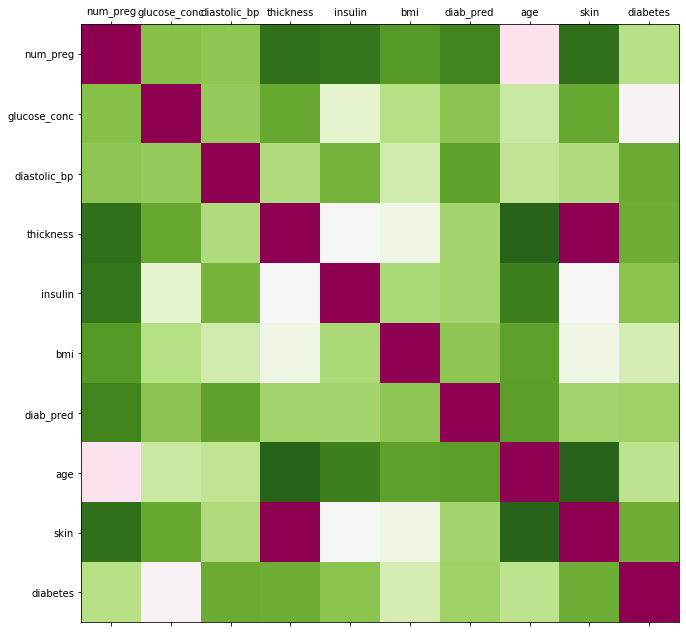

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0 as numberical data is easier to use

In [13]:
diabetes_map = {True : 1, False : 0}

In [14]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Check true/false ratio

In [17]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
total = num_true + num_false
print('Number of True cases:  {0} ({1:2.2f}%)'.format(num_true, (num_true / total) * 100))
print('Number of False cases: {0} ({1:2.2f}%)'.format(num_false, (num_false / total) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


### Spliting the data

70% for training, 30% for testing

In [18]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values        # predictor feature columns (8 X m)
y = df[predicted_class_names].values     # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=42)
                                   # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the desired 70% train, 30% test split of the data

In [19]:
print('{0:0.2f}% in training set'.format((len(X_train)/len(df.index)) * 100))
print('{0:0.2f}% in testing set'.format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in testing set


#### Verifying predicted value was split correctly

In [20]:
print('Original True  : {0} ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1]) / len(df.index) * 100)))
print('Original False : {0} ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0]) / len(df.index) * 100)))
print(' ')
print('Training True  : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100)))
print('Training False : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100)))
print(' ')
print('Testing True   : {0} ({1:0.2f}%)'.format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100)))
print('Testing False  : {0} ({1:0.2f}%)'.format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100)))
print(' ')

Original True  : 268 (34.90%)
Original False : 500 (65.10%)
 
Training True  : 188 (35.01%)
Training False : 349 (64.99%)
 
Testing True   : 80 (34.63%)
Testing False  : 151 (65.37%)
 


### Post-split Data Preparation

#### Hidden Missing Values

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Some are 0 values.  Is 0 a valid value for these features?

How many rows have unexpected 0 as value?

In [22]:
print('# rows in dataframe {0}'.format(len(df)))
print('# rows missing glucose_conc: {0}'.format(len(df.loc[df['glucose_conc'] == 0])))
print('# rows missing diastolic_bp: {0}'.format(len(df.loc[df['diastolic_bp'] == 0])))
print('# rows missing thickness: {0}'.format(len(df.loc[df['thickness'] == 0])))
print('# rows missing insulin: {0}'.format(len(df.loc[df['insulin'] == 0])))
print('# rows missing bmi: {0}'.format(len(df.loc[df['bmi'] == 0])))
print('# rows missing diab_pred: {0}'.format(len(df.loc[df['diab_pred'] == 0])))
print('# rows missing age: {0}'.format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

In [23]:
from sklearn.impute import SimpleImputer

# Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values = 0, strategy='mean')

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance on Training Data

In [31]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))
print(' ')

Accuracy: 0.7542
 


### Performance on Testing Data

In [32]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))
print(' ')

Accuracy: 0.7359
 


#### Metrics

In [33]:
print('Confusion Matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print(' ')

print('Classification Report')
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[118  33]
 [ 28  52]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


In [41]:
rf_predict_test = rf_model.predict(X_test)
# test metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [44]:
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, rf_predict_test))
print(' ')

print('Classification Report')
print(metrics.classification_report(y_test, rf_predict_test))


Confusion Matrix
[[119  32]
 [ 28  52]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7, random_state = 42, max_iter = 250)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, lr_predict_test))
print(' ')
print('Cassification Report')
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7359
Confusion Matrix
[[123  28]
 [ 33  47]]
 
Cassification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



#### Setting regularization parameter

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

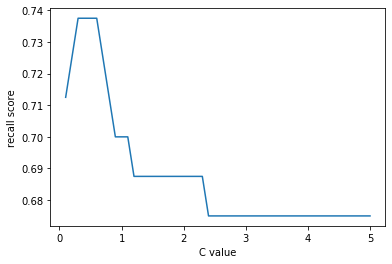

In [102]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state = 42, max_iter = 250, class_weight = 'balanced', solver = 'liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print('1st max value of {0:.3f} occured at C={1:.3f}'.format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, '-')
plt.xlabel('C value')
plt.ylabel('recall score')

### LogisticRegressionCV

In [110]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = False, class_weight = 'balanced', solver = 'liblinear')
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

### Predict on Test Data

In [111]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print(' ')
print('Cassification Report')
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7143
Confusion Matrix
[[110  41]
 [ 25  55]]
 
Cassification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231

